### Exam : MU5MEF41 - Optimisation
* Date : 20/02/2022
* Duration : from 09h00 to 18h00
* This exam consists of coding and written sections : respond to each question in the highlighted portion.

In [10]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import math

### Q1 (coding) : Gradient-descent methods : Conjugate-gradient (CG) 

We would like to optimise the function below 
$$
f = -\exp(-(x_1 x_2 - 1.5)^2-(x_2-1.5)^2),
$$
Using CG method. The starting point will be placed at $x_0 = [2.5 , 0.5]$. 

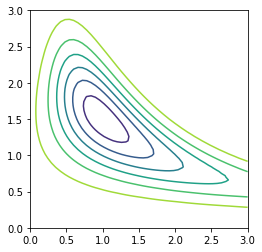

In [3]:
# plotting the function
nx = 50
ny = 50
# Geometrie
x = np.linspace(0,3,nx+1);
y = np.linspace(0,3,ny+1);
X, Y = np.meshgrid(x, y,indexing = 'ij')


F = -np.exp(-(X*Y - 1.5)**2-(Y-1.5)**2)

# plot the function
plt.contour(X,Y,F)
plt.axis('image')
plt.show()

First, the function and the gradient are defined symbolically as done in the class for TP1:

In [4]:
x1, x2, alpha = sp.symbols('x1 x2 alpha', real=True)    # Creating the variables
f             = -sp.exp(-(x1*x2 - 1.5)**2-(x2-1.5)**2)  # Function to minimize
gradf         = sp.Matrix([f.diff(x1), f.diff(x2)])     # Function Gradient

### Compare the performence of the CG method to the steepest descent using line search (LS). 
* The steepest descent with line-search is the one used in TP1 and is coded here for you
* Code the CG version and compare the two in the following plot

Initialise LS (line search algorithm of TP1)

In [6]:
x = sp.Matrix([2.5, 0.5])        # First initial guess
eps = 1e-3                       # Precision
stepDiffTab = np.array([])      
stepDiff = 1                     # Difference between 2 steps, init at 1 for the loop
stepCounter = 0 

Optimisation Loop of LS

In [7]:
searchSpace    = np.linspace(0.0, 1.0, num=100)           # Line-search range
alphaSpace     = np.zeros(len(searchSpace))               # Line-search results
trajectory_ls  = np.array([[2.5],[0.5]])                  # Trajectory of x


while ((stepDiff > eps) and (stepCounter < 100)):  
    
 
    # Calculating dk
    g = sp.Matrix(gradf.subs(x1, x[0]).subs(x2, x[1]))
    normg = np.linalg.norm(np.array([g[0], g[1]], dtype=float))
    d = -g/normg
    

    # Line search
    minProblem = f.subs(x1, x[0] + alpha*d[0]).subs(x2, x[1] + alpha*d[1])
    
    for i in range(len(searchSpace)) :
        alphaSpace[i] = minProblem.subs(alpha, searchSpace[i])
    minAlpha = searchSpace[np.argmin(alphaSpace)]
    
    # Actuating x
    normxOld = np.linalg.norm(np.array([x[0], x[1]], dtype=float))
    x        = x + minAlpha*d
    normxNew = np.linalg.norm(np.array([x[0], x[1]], dtype=float))
    stepDiff = abs(normxNew - normxOld)
    
    # Keeping x values
    trajectory_ls  = np.hstack((trajectory_ls, x))
    stepDiffTab = np.append(stepDiffTab,stepDiff)
    print('x = ', x)
    stepCounter += 1

x =  Matrix([[2.51704366641883], [0.721567663444796]])
x =  Matrix([[2.24511505209093], [0.700711153694530]])
x =  Matrix([[2.23617194194255], [0.811461773526744]])
x =  Matrix([[1.94373975780351], [0.794403393306855]])
x =  Matrix([[1.93575752459016], [0.935592073252617]])
x =  Matrix([[1.72539993650863], [0.908295667476522]])
x =  Matrix([[1.70741340584762], [1.04856128730789]])
x =  Matrix([[1.52748778514879], [1.02239600007826]])
x =  Matrix([[1.50452794084852], [1.16193382628179]])
x =  Matrix([[1.34410943302751], [1.14229493517200]])
x =  Matrix([[1.32714778460679], [1.27250799495524]])
x =  Matrix([[1.20649118876128], [1.26091643735006]])
x =  Matrix([[1.19262686178354], [1.37115916704141]])
x =  Matrix([[1.11303121795084], [1.35721357968400]])
x =  Matrix([[1.10529532819772], [1.42749619387629]])
x =  Matrix([[1.05515893154732], [1.42140506447100]])
x =  Matrix([[1.05529868620222], [1.46180886317370]])
x =  Matrix([[1.02517497484454], [1.45851710686653]])
x =  Matrix([[1.028169

Initialise CG (Conjugate-Gradient)

In [ ]:
x = sp.Matrix([2.5, 0.5])        # First initial guess
eps = 1e-3                       # Precision
stepDiffTab = np.array([])      
stepDiff = 1                     # Difference between 2 steps, init at 1 for the loop
stepCounter = 0

Optimisation loop CG

In [ ]:
trajectory_CG  = np.array([[2.5],[0.5]])                  # Trajectory of x


while ((stepDiff > eps) and (stepCounter < 100)): 



# Fill this part with your code solving this optimisation problem using CG-method




# Keeping x values
    trajectory_CG  = np.hstack((trajectory_CG, x))
    stepDiffTab = np.append(stepDiffTab,stepDiff)
    print('x = ', x)
    stepCounter += 1

minimum of f : x =  Matrix([[1.00876987617092], [1.49669761510589]])


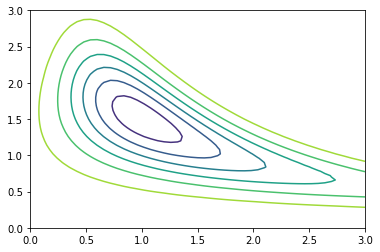

In [8]:
# Plot the results of LS and CG

print('minimum of f : x = ', x)

plt.contour(X,Y,F)
plt.plot(trajectory_CG[0], trajectory_CG[1])
plt.plot(trajectory_ls[0], trajectory_ls[1])

### Q2 (coding) - Simulated Annealing

Find the optimum of the following objective function: 
$$
\cal{J} = 0.2 + x_1^2 + x_2^2 - 0.1 cos(6 \pi x_1) - 0.1 cos(6 \pi x_2)
$$
Using the simulated annealing algorithm given in the notes of **session 4** and an annealing schedule of your choice. 

Text(0, 0.5, 'x2')

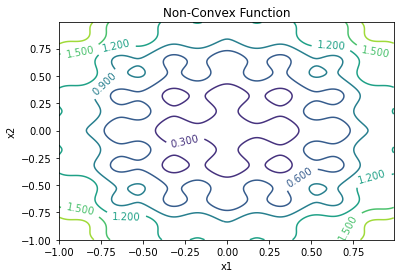

In [20]:
# define objective function
def f(x):
    x1 = x[0]
    x2 = x[1]
    obj = 0.2 + x1**2 + x2**2 - 0.1*math.cos(6.0*3.1415*x1) - 0.1*math.cos(6.0*3.1415*x2)
    return obj

# Start location
x_start = [0.8, -0.5]

# Design variables at mesh points
i1 = np.arange(-1.0, 1.0, 0.01)
i2 = np.arange(-1.0, 1.0, 0.01)
x1m, x2m = np.meshgrid(i1, i2)
fm = np.zeros(x1m.shape)
for i in range(x1m.shape[0]):
    for j in range(x1m.shape[1]):
        fm[i][j] = 0.2 + x1m[i][j]**2 + x2m[i][j]**2 \
             - 0.1*math.cos(6.0*3.1415*x1m[i][j]) \
             - 0.1*math.cos(6.0*3.1415*x2m[i][j])

# Create a contour plot
plt.figure()

CS = plt.contour(x1m, x2m, fm)
# Label contours
plt.clabel(CS, inline=1, fontsize=10)
# Add some text to the plot
plt.title('Non-Convex Function')
plt.xlabel('x1')
plt.ylabel('x2')


### Simulated annealing algorithm here 




# print solution

plt.plot(x[:,0],x[:,1],'y-o')
plt.show()




### Q3 (Written) : Adjoint-equations - Drive to a Final Target State by Time-Dependent Forcing

Consider now the problem of driving the final state $q(T)$ as close as possible to the desired target $p$ using a control continuously applied to the right-hand-side of the evolution ODE system $dq/dt = f(q, g, t)$, where the initial condition $q(0) = q_0$ is given. 

A cost function including the cost of the control is 
$$
\cal{J} = \dfrac{1}{2}[q(T) - p]\cdot[q(T) - p] + \dfrac{\gamma^2}{2}\int_0^T (g\cdot g)dt
$$
where the weight $\gamma^2$ is chosen so as to put the desired respective emphasis on the final target objective (small values of $\gamma$) or on the cost of the control (large values of $\gamma$). The Lagrangian is defined in the usual way
$$
\cal{L} = \cal{J} - \int_0^T a\cdot\left[\dfrac{dq}{dt} - f(q,g,t)\right]dt - b\cdot [q(0) - q_0] 
$$

Derive the optimality system : 

* State equation:  (response here)


* Adjoint equations: (response here)


* Optimality Condition: (response here)
    
**Note: The full derivation is required - you can use paper or write your derivation directly in this section. If you choose the paper, please scan your responses and send as a PDF together with this notebook.**